# Problem definition

Given an equation try to predict its outputs using a neural network.

- lists


## Teste


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Set the matplotlib figure size
plt.rcParams['figure.figsize'] = (12,9)

# Equation definition
Some ideas:
1. $f(x) = 2x$
2. $f(x) = x^2 + 1$
3. $f(x) = -x^3 + x^2$
4. $f(x) = log(|x|)$


In [55]:
def equation(x):
    return - np.sin(x) / x

# Creating dataset

Based on the equation defined above we can create a dataset with few samples to work on. 

We can also add some randon noise to simulate some real wolrd data.

In [61]:
# Creates all the X's values
x = np.random.uniform(-10, 10, (600,1)) 

# Builds a Pandas DataFrame
df = pd.DataFrame(x, columns=['x'])

# Apply the equation to create the f_x column in the dataset
df['f_x'] = df.x.apply(equation)

# Adding some noise to the x column 
mu, sigma = 0, 0.7
df['x'] = df['x'] + np.random.normal(mu, sigma, df['x'].shape)

# Exploring our data

Whith the help of pandas capabilities we can explore and manipulate the Datasets

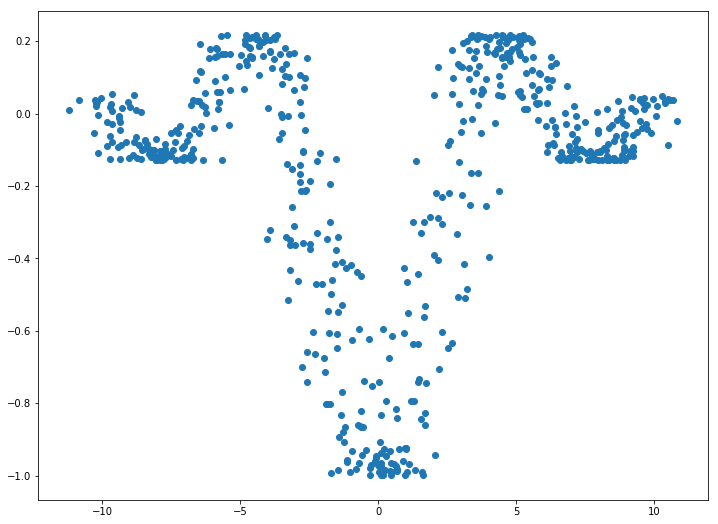

In [62]:
# Plot the distribution
plt.scatter(df.x, df.f_x);

# Neural network definition

Here we can define our network and try to fit our Dataset distribution in one Neural Network Model

![nn](assets/neural_net.jpeg)

In [70]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

# Input layer (1 - feature)
X_inputs = Input((1,))

X = Dense(1000, activation='relu')(X_inputs)
X = Dense(1000, activation='relu')(X)
X = Dense(1000, activation='relu')(X)
X = Dense(1000, activation='relu')(X)
X = Dense(1000, activation='relu')(X)
X = Dense(1)(X)

# Model definition
model = Model(inputs=X_inputs, outputs=X)

# Model setup (optimizer and loss function)
model.compile(optimizer='adam', loss='mse')

# Training

Training our model to predict $f(x)$ without knowing the equation definition.

The model actually will try to approximate the equation by applying a series of optimizations to its own neural network

In [51]:
# Fitting/Training  the model
model.fit(df.x, df.f_x, batch_size=32, epochs=200, verbose=0);

# Plot the result 

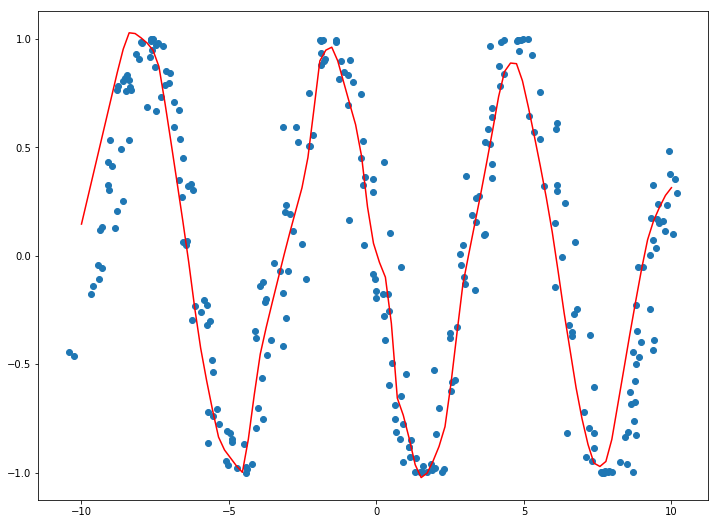

In [52]:
range_x = np.linspace(-10,10,100)
pred_x = model.predict(range_x)
plt.scatter(df.x, df.f_x)
plt.plot(range_x, pred_x, color='r');

# Leaning animation

In [ ]:
from IPython.display import HTML
from matplotlib import animation

fig = plt.figure()
ax = plt.axes()
ax.scatter(df.x, df.f_x)
line, = plt.plot([], [], color='r');

def init():
    line.set_data([], [])
    return line,

def animate(i):
    results = model.fit(df.x, df.f_x, batch_size=32, epochs=1, verbose=0);    
    range_x = np.linspace(-10,10,1000)
    pred_x = model.predict(range_x)
    line.set_data(range_x, pred_x)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

HTML(anim.to_jshtml())